<a href="https://colab.research.google.com/github/gauravraidata/IITJ-projects/blob/main/AI_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A.) Dynamic Goal-Based Agent for Warehouse Logistics Optimization.

A robotic agent operates in a warehouse modeled as an N×M grid environment. The agent starts
at a predefined loading dock and must deliver packages to multiple destinations marked on the
grid while avoiding dynamically placed obstacles.
Take suitable values of the following parameters.
- Warehouse dimensions: N×M grid size (M,N between 5 and 10, inclusive)
- Number of packages: P (between 2 and 6, inclusive)
- Number of obstacles: O (between 1 and 10, inclusive)
- Package locations: (X1, Y1), (X2, Y2), ... (XP, YP)
- Drop-off locations: (D1X, D1Y), (D2X, D2Y), ... (DPX, DPY)
- Robot starting position: S=(Sx
,Sy), starts at a fixed cell but moves dynamically
- Movement cost: Each movement incurs a cost of 1 unit
- Delivery reward: Successfully delivering a package adds 10 units to the total reward
- Obstacle penalty: Hitting an obstacle results in a (-5) penalty
Note : Packages locations and drop-off locations should not overlap.

Q1. Represent the warehouse as an N×M matrix. Place the packages, drop-off points, and
obstacles randomly. Display the initial warehouse configuration.

Q2. Implement a goal-based agent that can identify all goals, plan a sequence of actions to reach
the goal, use a search algorithm (BFS, DFS, or UCS) to find optimal paths, deliver all packages,
and calculate the total cost.

Q3. Choose a random seed value for the ease of reproducing the results. Your program should
give outputs: the chosen path taken by the agent, total cost and rewards, final score based on
penalties, movement costs, and successful deliveries.

In [10]:
import random
import numpy as np
from queue import Queue
import matplotlib.pyplot as plt
import seaborn as sns

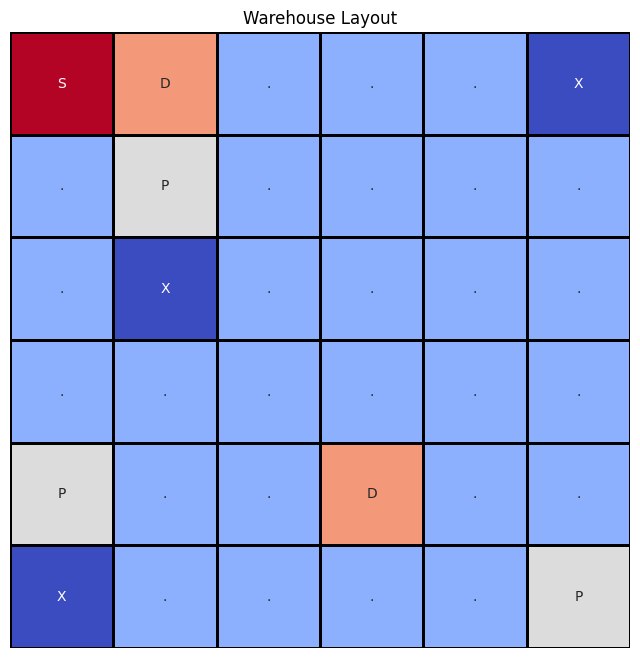


Path for P1 (Pickup: (1, 1) -> Dropoff: (4, 3)):
Steps Taken: 8
Paths Explored: 39
Explored Coordinates: [(0, 0), (1, 0), (0, 1), (2, 0), (1, 1), (1, 1), (0, 1), (1, 0), (1, 2), (0, 0), (0, 2), (0, 0), (2, 0), (0, 2), (2, 2), (1, 3), (0, 3), (3, 0), (3, 2), (2, 3), (0, 3), (2, 3), (1, 4), (0, 4), (4, 0), (3, 1), (4, 2), (3, 1), (3, 3), (3, 3), (2, 4), (0, 4), (2, 4), (1, 5), (4, 1), (4, 1), (5, 2), (4, 1), (4, 3)]
Selected Path (No Duplicates): [(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3)]
Penalty Incurred: 0
Penalty Coordinates: []


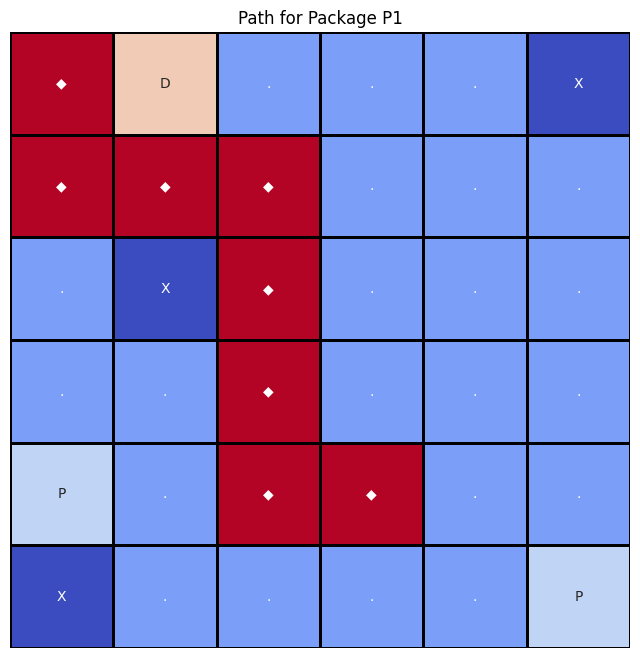


Path for P2 (Pickup: (5, 5) -> Dropoff: (0, 0)):
Steps Taken: 14
Paths Explored: 77
Explored Coordinates: [(4, 3), (3, 3), (5, 3), (4, 2), (4, 4), (2, 3), (3, 2), (3, 4), (5, 2), (5, 4), (3, 2), (5, 2), (4, 1), (3, 4), (5, 4), (4, 5), (1, 3), (2, 2), (2, 4), (2, 2), (3, 1), (2, 4), (3, 5), (5, 1), (5, 5), (5, 5), (4, 5), (5, 4), (3, 5), (4, 4), (4, 4), (5, 3), (2, 5), (3, 4), (3, 4), (4, 3), (4, 3), (5, 2), (1, 5), (2, 4), (2, 4), (3, 3), (3, 3), (4, 2), (4, 2), (5, 1), (1, 4), (1, 4), (2, 3), (2, 3), (3, 2), (3, 2), (4, 1), (4, 1), (0, 4), (1, 3), (1, 3), (2, 2), (2, 2), (3, 1), (3, 1), (4, 0), (0, 3), (0, 3), (1, 2), (1, 2), (3, 0), (3, 0), (0, 2), (0, 2), (1, 1), (2, 0), (0, 1), (0, 1), (1, 0), (1, 0), (0, 0)]
Selected Path (No Duplicates): [(4, 3), (5, 3), (5, 4), (5, 5), (4, 5), (3, 5), (2, 5), (1, 5), (1, 4), (0, 4), (0, 3), (0, 2), (0, 1), (0, 0)]
Penalty Incurred: 0
Penalty Coordinates: []


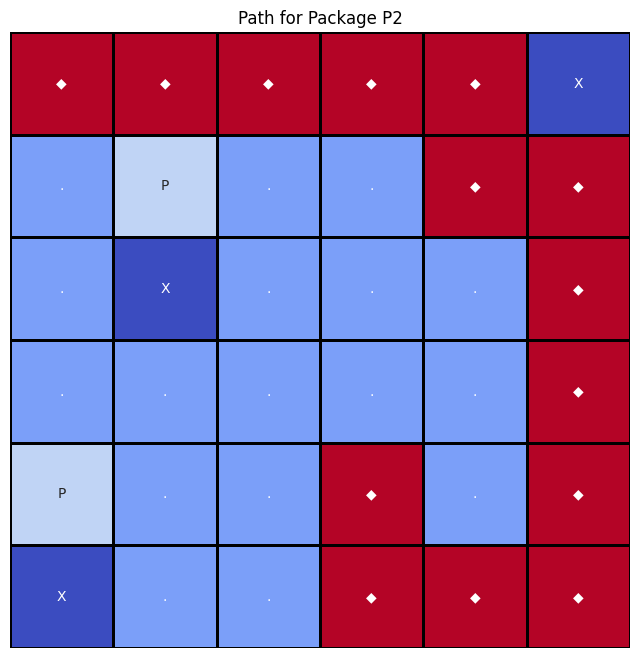


Path for P3 (Pickup: (4, 0) -> Dropoff: (0, 1)):
Steps Taken: 6
Paths Explored: 35
Explored Coordinates: [(0, 0), (1, 0), (0, 1), (2, 0), (1, 1), (1, 1), (0, 2), (3, 0), (1, 2), (1, 2), (0, 3), (4, 0), (4, 0), (3, 0), (4, 1), (2, 0), (3, 1), (3, 1), (5, 1), (4, 2), (1, 0), (3, 2), (5, 2), (3, 2), (5, 2), (4, 3), (0, 0), (1, 1), (2, 2), (3, 3), (5, 3), (3, 3), (5, 3), (4, 4), (0, 1)]
Selected Path (No Duplicates): [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1)]
Penalty Incurred: 0
Penalty Coordinates: []


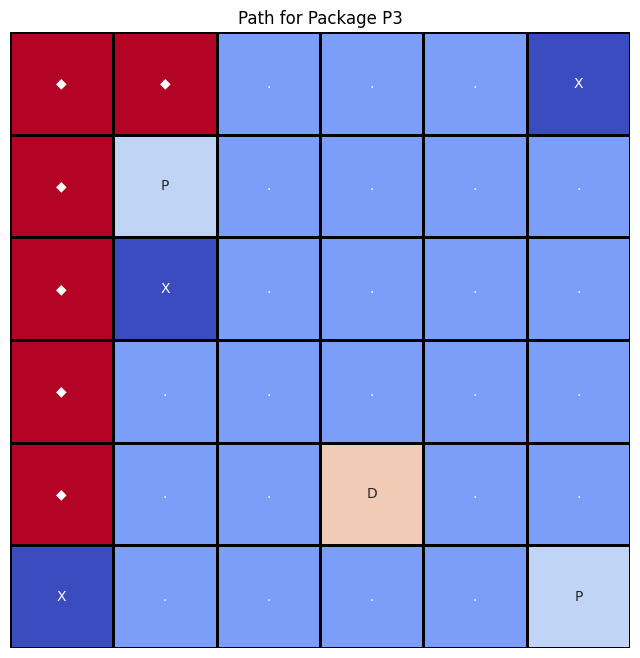


Total Steps Taken: 35
Total Cost: 35
Total Reward: 30
Total Penalty: 0
Total Paths Explored: 151
Final Score: -5

Penalty Details Per Package:
P1: Penalty = 0, Coordinates = []
P2: Penalty = 0, Coordinates = []
P3: Penalty = 0, Coordinates = []


In [13]:
class WarehouseAgent:
    def __init__(self, N, M, P, O, seed=42):
        self.N = N
        self.M = M
        self.P = P
        self.O = O
        self.seed = seed
        self.total_cost = 0
        self.reward = 0
        self.penalty = 0
        self.steps_taken = 0
        self.start = (0, 0)
        self.warehouse, self.packages, self.dropoffs, self.obstacles = self.initialize_warehouse()

    def initialize_warehouse(self):
        random.seed(self.seed)
        warehouse = np.full((self.N, self.M), '.', dtype=str)
        obstacles = set()
        while len(obstacles) < self.O:
            x, y = random.randint(0, self.N-1), random.randint(0, self.M-1)
            if (x, y) not in obstacles:
                obstacles.add((x, y))
                warehouse[x, y] = 'X'

        package_locations = []
        dropoff_locations = []
        while len(package_locations) < self.P:
            px, py = random.randint(0, self.N-1), random.randint(0, self.M-1)
            if (px, py) != self.start and (px, py) not in obstacles and (px, py) not in package_locations and (px, py) not in dropoff_locations:
                package_locations.append((px, py))
                warehouse[px, py] = f'P{len(package_locations)}'

        while len(dropoff_locations) < self.P:
            dx, dy = random.randint(0, self.N-1), random.randint(0, self.M-1)
            if (dx, dy) not in obstacles and (dx, dy) not in package_locations and (dx, dy) not in dropoff_locations:
                dropoff_locations.append((dx, dy))
                warehouse[dx, dy] = f'D{len(dropoff_locations)}'

        warehouse[self.start] = 'S'
        return warehouse, package_locations, dropoff_locations, obstacles

    def display_warehouse(self):
        # Create a numeric representation of the warehouse for heatmap visualization
        numeric_warehouse = np.zeros((self.N, self.M))
        for x in range(self.N):
            for y in range(self.M):
                if self.warehouse[x, y] == 'X':  # Obstacles
                    numeric_warehouse[x, y] = -1
                elif self.warehouse[x, y].startswith('P'):  # Packages
                    numeric_warehouse[x, y] = 1
                elif self.warehouse[x, y].startswith('D'):  # Drop-offs
                    numeric_warehouse[x, y] = 2
                elif self.warehouse[x, y] == 'S':  # Start position
                    numeric_warehouse[x, y] = 3

        plt.figure(figsize=(8, 8))
        sns.heatmap(numeric_warehouse, annot=self.warehouse, cmap='coolwarm', cbar=False,
                    linewidths=1, linecolor='black', fmt='')
        plt.xticks([])
        plt.yticks([])
        plt.title("Warehouse Layout")
        plt.show()


    def bfs_search(self, start, goal):
        queue = Queue()
        queue.put((start, []))
        visited = set()
        paths_explored = 0
        explored_nodes = []

        while not queue.empty():
            (x, y), path = queue.get()
            paths_explored += 1
            explored_nodes.append((x, y))

            if (x, y) == goal:
                return path + [(x, y)], paths_explored, explored_nodes

            if (x, y) in visited:
                continue
            visited.add((x, y))

            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < self.N and 0 <= ny < self.M:
                    # Skip obstacle cells to avoid penalty.
                    if (nx, ny) in self.obstacles or (nx, ny) in visited:
                        continue
                    queue.put(((nx, ny), path + [(x, y)]))

        return [], paths_explored, explored_nodes

    def display_path(self, path, package_num):
        # Create a copy of the warehouse layout to add path markers
        temp_warehouse = np.copy(self.warehouse)
        for x, y in path:
            temp_warehouse[x, y] = '◆'  # Mark the path with a special symbol

        # Create a numeric representation of the warehouse for heatmap visualization
        numeric_temp_warehouse = np.zeros((self.N, self.M))
        for x in range(self.N):
            for y in range(self.M):
                if temp_warehouse[x, y] == 'X':  # Obstacles
                    numeric_temp_warehouse[x, y] = -1
                elif temp_warehouse[x, y].startswith('P'):  # Packages
                    numeric_temp_warehouse[x, y] = 1
                elif temp_warehouse[x, y].startswith('D'):  # Drop-offs
                    numeric_temp_warehouse[x, y] = 2
                elif temp_warehouse[x, y] == 'S':  # Start position
                    numeric_temp_warehouse[x, y] = 3
                elif temp_warehouse[x, y] == '◆':  # Path markers
                    numeric_temp_warehouse[x, y] = 4

        plt.figure(figsize=(8, 8))
        sns.heatmap(numeric_temp_warehouse, annot=temp_warehouse, cmap='coolwarm', cbar=False,
                    linewidths=1, linecolor='black', fmt='')
        plt.xticks([])
        plt.yticks([])
        plt.title(f"Path for Package P{package_num}")
        plt.show()

    def run(self):
        self.display_warehouse()

        total_paths_explored = 0
        total_penalty_per_package = {}

        for i in range(self.P):
            pickup = self.packages[i]
            dropoff = self.dropoffs[i]

            # Find path to pickup location
            path_to_pickup, explored_pickup, explored_nodes_pickup = self.bfs_search(self.start, pickup)

            # Find path to dropoff location
            path_to_dropoff, explored_dropoff, explored_nodes_dropoff = self.bfs_search(pickup, dropoff)

            total_paths_explored += explored_pickup + explored_dropoff

            # Calculate penalties (if any)
            penalty_cost = 0
            penalty_coordinates = []

            if path_to_pickup and path_to_dropoff:
                steps = len(path_to_pickup) + len(path_to_dropoff)
                self.steps_taken += steps
                self.total_cost += steps
                self.reward += 10  # Reward for successful delivery
                self.start = dropoff  # Update start position after delivery

                # Combine paths and remove duplicates
                final_path = []
                visited_set = set()
                for coord in path_to_pickup + path_to_dropoff:
                    if coord not in visited_set:
                        final_path.append(coord)
                        visited_set.add(coord)

                print(f"\nPath for P{i+1} (Pickup: {pickup} -> Dropoff: {dropoff}):")
                print(f"Steps Taken: {len(final_path)}")
                print(f"Paths Explored: {explored_pickup + explored_dropoff}")
                print(f"Explored Coordinates: {explored_nodes_pickup + explored_nodes_dropoff}")
                print(f"Selected Path (No Duplicates): {final_path}")
                print(f"Penalty Incurred: {penalty_cost}")
                print(f"Penalty Coordinates: {penalty_coordinates}")

                # Store penalty details per package
                total_penalty_per_package[f'P{i+1}'] = {
                    "penalty_cost": penalty_cost,
                    "penalty_coordinates": penalty_coordinates
                }

                # Display the path visually
                self.display_path(final_path, i+1)

        # Calculate final score
        final_score = self.reward - self.total_cost - self.penalty
        print("\nTotal Steps Taken:", self.steps_taken)
        print("Total Cost:", self.total_cost)
        print("Total Reward:", self.reward)
        print("Total Penalty:", self.penalty)
        print("Total Paths Explored:", total_paths_explored)
        print("Final Score:", final_score)

        # Print penalty details per package
        print("\nPenalty Details Per Package:")
        for pkg, details in total_penalty_per_package.items():
            print(f"{pkg}: Penalty = {details['penalty_cost']}, Coordinates = {details['penalty_coordinates']}")




if __name__ == "__main__":
    agent = WarehouseAgent(N=6, M=6, P=3, O=3)
    agent.run()


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Question 2

B.) Suppose you and your friend live in different cities on a map and you both are planning for a
common meetup place which is optimal for you both. Let’s find the common meetup with a little
twist.
On every turn, you and your friend can simultaneously move to a neighboring city on the map.
The amount of time needed to move from city i to neighbor j is equal to the straight line distance
d(i, j)x2 between the cities, but on each turn the friend that arrives first must wait until the other
one arrives (and calls the first on his/her cell phone) before the next turn can begin. The heuristic
you are assuming is the straight line distance d(i,j). You both friends want to meet as quickly as
possible.
1. Formulate this search problem and display the map of the city with heuristic (h) and
transition cost (g).
2. Implement search strategies: a. Greedy Best First Search b. A* and provide the Search
Cost (nodes generated, space and time taken for execution ) for both of them.
 3. Change the heuristic function d(i, j) from the straight-line distance between cities i and j to
more realistic functions such as road or train route distance. And provide the analysis of the
solution for different heuristic functions in terms of Search Cost (nodes generated, space and
time taken for execution ).
Note:
1. Use maps of India for the cities [Taluka level granularity is expected]. One city will be
your current city and Your friend City should be at least in a different state. You can take
lat, long of the Taluka center for calculating the distance.
2. Take necessary Assumptions.
Material:
Can use the following links for maps.
https://surveyofindia.gov.in/pages/political-map-of-india
Can use QGIS for initial preprocessing of the maps or Geopandas

My city (Pune): (18.5213738, 73.8545071)
Friend's city (Hyderabad): (17.360589, 78.4740613)
Creating road network graph...
Selected meetup node coordinates: (76.1638335405934, 17.933444972976016)

Running Greedy Best First Search...

Path from My City to Meetup Point:
(18.5209159398776, 73.84880826592189)
(18.515527738887677, 73.85180656191629)
(18.51000024489801, 73.85458372791109)
(18.506666095904244, 73.85494226091042)
(18.504804634907725, 73.86294546589546)
(18.5030002519111, 73.87236031187786)
(18.50227732691245, 73.87500007487293)
(18.501638506913643, 73.87722006886877)
(18.499305679918006, 73.88536067685355)
(18.497917096920602, 73.89808661382976)
(18.4943886559272, 73.92297356678323)
(18.494193985927563, 73.92441563678052)
(18.492082666931513, 73.93939199675253)
(18.49250035693073, 73.95908352871571)
(18.492584272930575, 73.96228027470973)
(18.489528709936287, 73.99980924863956)
(18.482721307949014, 74.0173338956068)
(18.482055649950258, 74.02850341758591)
(18.480583150953013, 

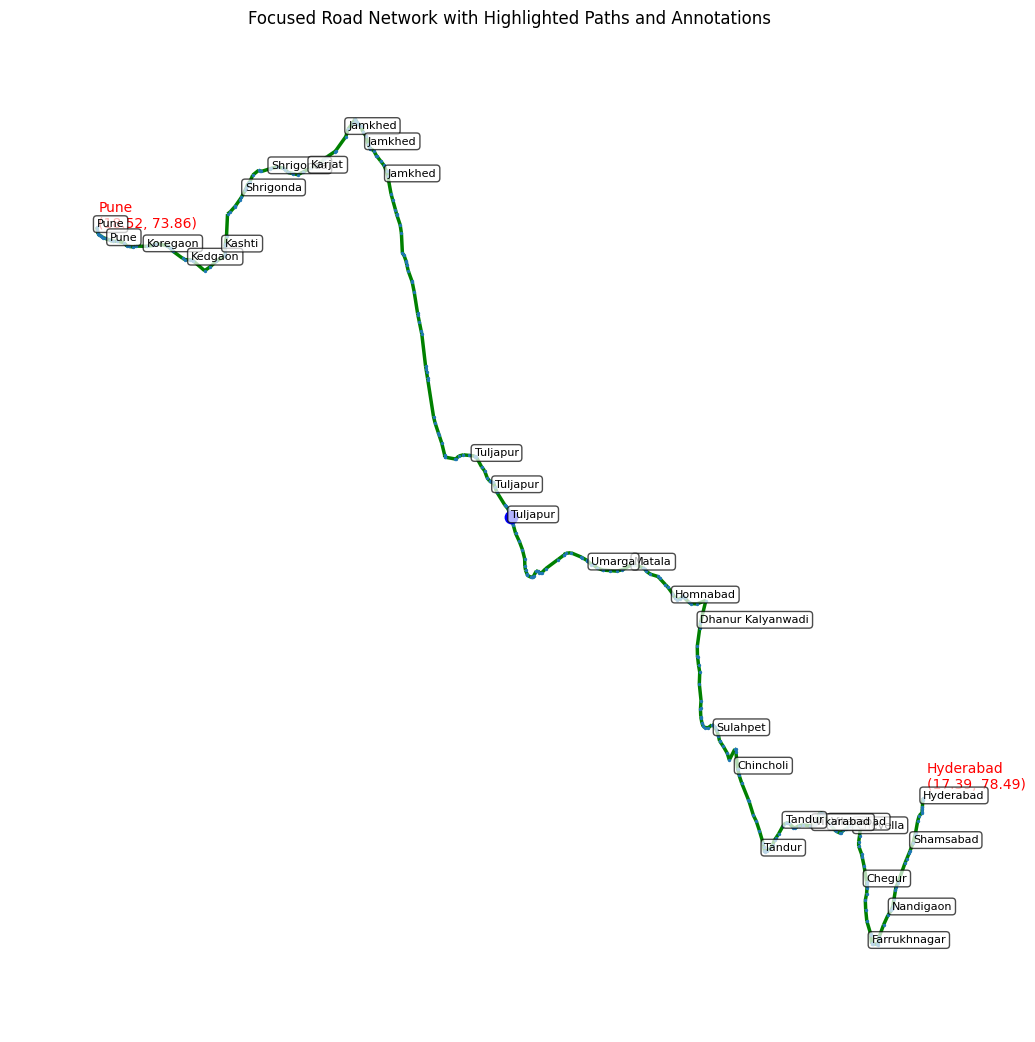

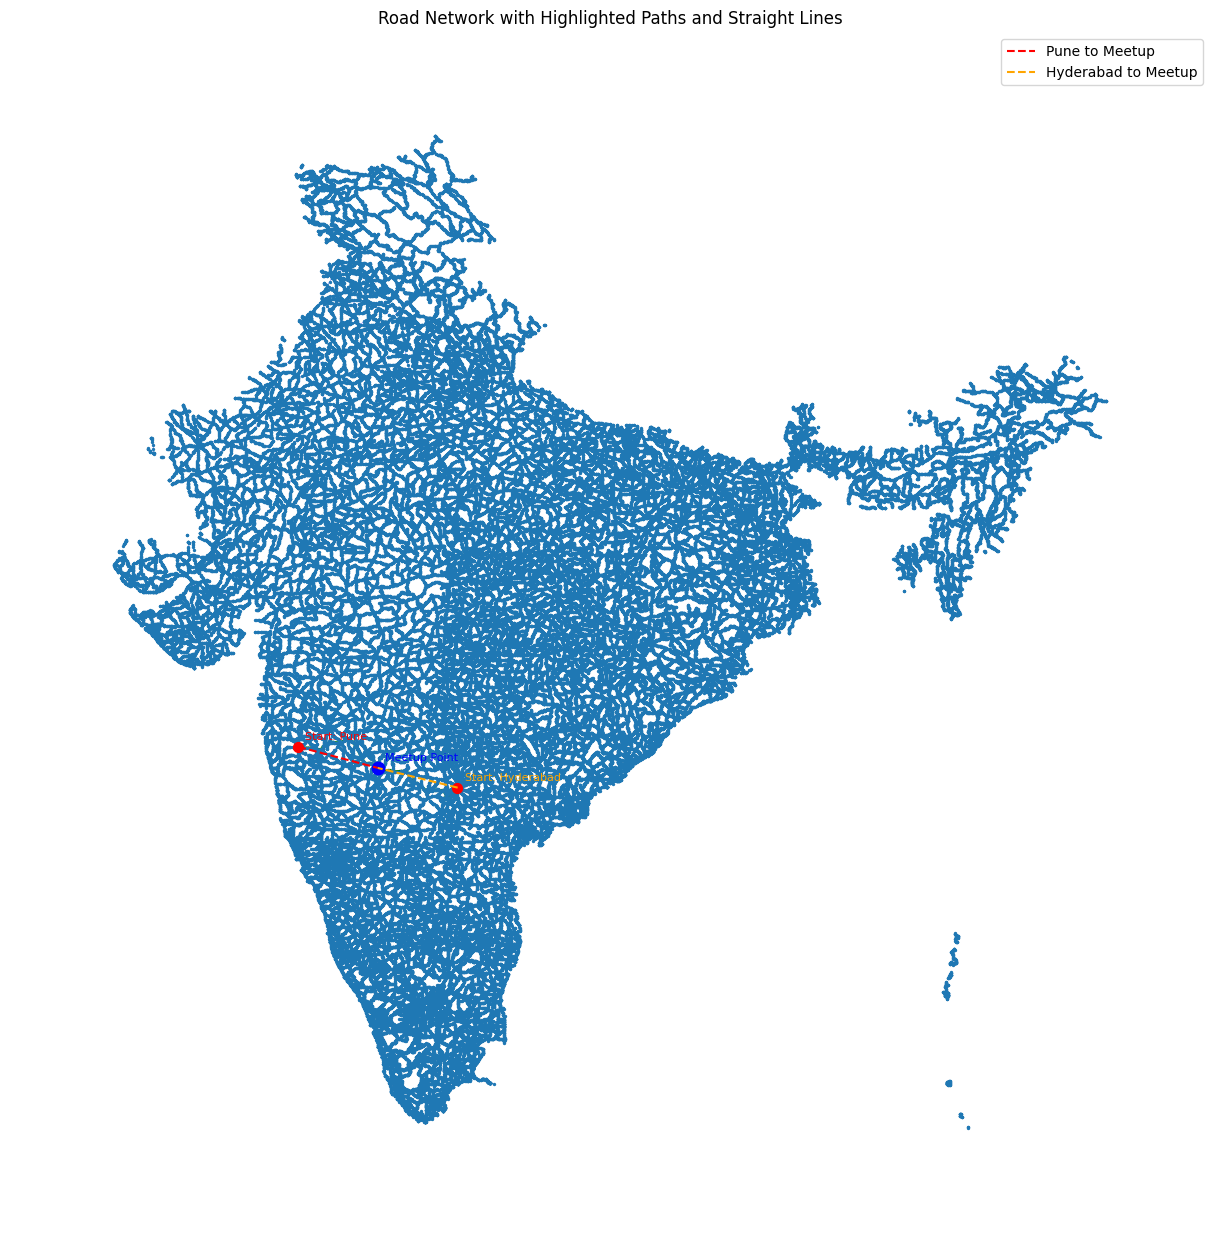

In [25]:
import geopandas as gpd
import pandas as pd
import networkx as nx
import heapq
import os
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt

# Load Road Network Shapefile (Replace with your local path)
roads = gpd.read_file("/content/drive/MyDrive/Assignment files/Ass1 AI/IND_roads.shp")


# Function to get latitude and longitude of a location using Geopy with rate limiting
def get_lat_long(location_name):
    user_agent = os.environ.get("NOMINATIM_USER_AGENT", "my-geocoding-app")
    geolocator = Nominatim(user_agent=user_agent)
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
    location = geocode(location_name + ", India", timeout=10)
    if location:
        return (location.latitude, location.longitude)
    else:
        raise ValueError(f"Could not find coordinates for {location_name}")

# Distance calculation function
def straight_line_distance(coord1, coord2):
    return geodesic(coord1, coord2).km

# Create Graph from Road Network Shapefile
def create_graph(roads_gdf):
    G = nx.Graph()
    for _, row in roads_gdf.iterrows():
        geom = row.geometry
        if geom.geom_type == 'LineString':
            coords = list(geom.coords)
            for i in range(len(coords) - 1):
                start, end = coords[i], coords[i+1]
                dist = geodesic((start[1], start[0]), (end[1], end[0])).km
                G.add_edge(start, end, weight=dist)
        elif geom.geom_type == 'MultiLineString':
            for line in geom.geoms:
                coords = list(line.coords)
                for i in range(len(coords) - 1):
                    start, end = coords[i], coords[i+1]
                    dist = geodesic((start[1], start[0]), (end[1], end[0])).km
                    G.add_edge(start, end, weight=dist)
    return G

# Greedy Best First Search Implementation
def greedy_best_first_search(graph, start, goal):
    frontier = [(straight_line_distance((start[1], start[0]), (goal[1], goal[0])), start)]
    explored = set()
    path_tracker = {start: None}

    while frontier:
        _, current = heapq.heappop(frontier)

        if current == goal:
            path = []
            while current is not None:
                path.append(current)
                current = path_tracker[current]
            return path[::-1]

        explored.add(current)

        for neighbor in graph.neighbors(current):
            if neighbor not in explored and neighbor not in [f[1] for f in frontier]:
                heapq.heappush(frontier, (straight_line_distance((neighbor[1], neighbor[0]), (goal[1], goal[0])), neighbor))
                path_tracker[neighbor] = current

    return []

def visualize_focused_paths_with_annotations(graph, my_path_nodes, friend_path_nodes, my_city_name, my_city_coord, friend_city_name, friend_city_coord, cities_df):
    plt.figure(figsize=(10, 10))

    # Extract all nodes in both paths
    all_path_nodes = set(my_path_nodes + friend_path_nodes)

    # Filter graph to include only nodes and edges near the paths
    subgraph_nodes = set()
    subgraph_edges = []

    for node in all_path_nodes:
        subgraph_nodes.add(node)
        for neighbor in graph.neighbors(node):
            if neighbor in all_path_nodes:
                subgraph_edges.append((node, neighbor))
                subgraph_nodes.add(neighbor)

    # Create a subgraph with filtered nodes and edges
    subgraph = graph.subgraph(subgraph_nodes)

    # Draw the filtered graph with nearby roads
    pos = {node: (node[0], node[1]) for node in subgraph.nodes()}
    nx.draw(subgraph, pos=pos, node_size=2, edge_color="gray", width=0.5)

    # Highlight My City's Path in green color
    my_path_edges = list(zip(my_path_nodes[:-1], my_path_nodes[1:]))
    nx.draw_networkx_edges(subgraph, pos=pos, edgelist=my_path_edges, edge_color="green", width=2.5)

    # Highlight Friend's Path in green color
    friend_path_edges = list(zip(friend_path_nodes[:-1], friend_path_nodes[1:]))
    nx.draw_networkx_edges(subgraph, pos=pos, edgelist=friend_path_edges, edge_color="green", width=2.5)

    # Highlight Meetup Point in blue color with larger size for clarity
    nx.draw_networkx_nodes(subgraph, pos=pos, nodelist=[my_path_nodes[-1]], node_color="blue", node_size=80)

    # Annotate city names and coordinates
    plt.text(my_city_coord[1], my_city_coord[0], f"{my_city_name}\n({my_city_coord[0]:.2f}, {my_city_coord[1]:.2f})", fontsize=10, color="red")
    plt.text(friend_city_coord[1], friend_city_coord[0], f"{friend_city_name}\n({friend_city_coord[0]:.2f}, {friend_city_coord[1]:.2f})", fontsize=10, color="red")

    ax = plt.gca()  # Get the current axes
    add_city_annotations(my_path_nodes, cities_df, ax)
    add_city_annotations(friend_path_nodes, cities_df, ax)

    plt.title("Focused Road Network with Highlighted Paths and Annotations")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.show()

def add_city_annotations(path_nodes, cities_df, ax):
    for node in path_nodes[::10]:  # Annotate every 5th node to avoid clutter
        city_name, distance = find_nearest_city(node, cities_df)
        if distance < 20:  # Only annotate if city is within 20km
            ax.text(node[0], node[1], city_name, fontsize=8, color="black",
                    bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'))

def find_nearest_city(node, cities_df):
    node_coord = (node[1], node[0])  # Convert from (lon, lat) to (lat, lon)
    min_distance = float('inf')
    nearest_city = None

    for _, city in cities_df.iterrows():
        city_coord = (city['lat'], city['lon'])
        distance = geodesic(node_coord, city_coord).km
        if distance < min_distance:
            min_distance = distance
            nearest_city = city

    return nearest_city['city'], min_distance


def visualize_entire_network_with_lines(graph, my_path_nodes, friend_path_nodes, my_city_coord, friend_city_coord, my_city_name, friend_city_name):
    plt.figure(figsize=(12, 12))

    # Draw entire graph with blue edges (default road network)
    pos = {node: (node[0], node[1]) for node in graph.nodes()}
    nx.draw(graph, pos=pos, node_size=2, edge_color="blue", width=0.2)

    # Highlight My City's Path in green color
    my_path_edges = list(zip(my_path_nodes[:-1], my_path_nodes[1:]))
    nx.draw_networkx_edges(graph, pos=pos, edgelist=my_path_edges, edge_color="green", width=2.5)

    # Highlight Friend's Path in green color
    friend_path_edges = list(zip(friend_path_nodes[:-1], friend_path_nodes[1:]))
    nx.draw_networkx_edges(graph, pos=pos, edgelist=friend_path_edges, edge_color="green", width=2.5)

    # Highlight My Start Location in red color
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=[my_path_nodes[0]], node_color="red", node_size=50)

    # Highlight Friend's Start Location in red color
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=[friend_path_nodes[0]], node_color="red", node_size=50)

    # Highlight Meetup Point in blue color with larger size for clarity
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=[my_path_nodes[-1]], node_color="blue", node_size=80)

    # Draw straight lines connecting start nodes to meetup point
    plt.plot([my_city_coord[1], my_path_nodes[-1][0]], [my_city_coord[0], my_path_nodes[-1][1]], linestyle="--", color="red", label=f"{my_city_name} to Meetup")
    plt.plot([friend_city_coord[1], friend_path_nodes[-1][0]], [friend_city_coord[0], friend_path_nodes[-1][1]], linestyle="--", color="orange", label=f"{friend_city_name} to Meetup")

    # Annotate starting, ending, and meeting points
    plt.annotate(f"Start: {my_city_name}", (my_city_coord[1], my_city_coord[0]), xytext=(5, 5), textcoords="offset points", color="red", fontsize=8)
    plt.annotate(f"Start: {friend_city_name}", (friend_city_coord[1], friend_city_coord[0]), xytext=(5, 5), textcoords="offset points", color="orange", fontsize=8)
    plt.annotate("Meetup Point", (my_path_nodes[-1][0], my_path_nodes[-1][1]), xytext=(5, 5), textcoords="offset points", color="blue", fontsize=8)

    plt.title("Road Network with Highlighted Paths and Straight Lines")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.grid(True)
    plt.show()



# Main Execution Function
def main():

    cities_df = pd.read_csv("/content/drive/MyDrive/Assignment files/Ass1 AI/cities_data.csv")
    my_city_name = "Pune"
    friend_city_name = "Hyderabad"

    my_city_coord = get_lat_long(my_city_name)
    friend_city_coord = get_lat_long(friend_city_name)

    print(f"My city ({my_city_name}): {my_city_coord}")
    print(f"Friend's city ({friend_city_name}): {friend_city_coord}")

    print("Creating road network graph...")
    graph = create_graph(roads)

    my_node = min(graph.nodes(), key=lambda n: straight_line_distance((n[1], n[0]), my_city_coord))
    friend_node = min(graph.nodes(), key=lambda n: straight_line_distance((n[1], n[0]), friend_city_coord))

    midpoint_coord = ((my_city_coord[0] + friend_city_coord[0]) / 2,
                      (my_city_coord[1] + friend_city_coord[1]) / 2)

    meetup_node = min(graph.nodes(), key=lambda n: straight_line_distance((n[1], n[0]), midpoint_coord))

    print(f"Selected meetup node coordinates: {meetup_node}")

    print("\nRunning Greedy Best First Search...")

    # Greedy Best First Search for My City to Meetup Point
    my_path_nodes = greedy_best_first_search(graph, my_node, meetup_node)

    # Greedy Best First Search for Friend's City to Meetup Point
    friend_path_nodes = greedy_best_first_search(graph, friend_node, meetup_node)

    # Print Latitude-Longitude Sequence of Paths
    print("\nPath from My City to Meetup Point:")
    for node in my_path_nodes:
        print(f"({node[1]}, {node[0]})")

    print("\nPath from Friend's City to Meetup Point:")
    for node in friend_path_nodes:
        print(f"({node[1]}, {node[0]})")

    # Visualize Focused Paths with Annotations
    visualize_focused_paths_with_annotations(
        graph,
        my_path_nodes,
        friend_path_nodes,
        "Pune",
        (18.5204, 73.8567),
        "Hyderabad",
        (17.3850, 78.4867),
        cities_df
    )

    visualize_entire_network_with_lines(
        graph,
        my_path_nodes,
        friend_path_nodes,
        (18.5204, 73.8567),  # Pune coordinates
        (17.3850, 78.4867),  # Hyderabad coordinates
        "Pune",
        "Hyderabad"
    )



if __name__ == "__main__":
    main()
